In [77]:
import findspark
findspark.init("/home/elourajini/spark-2.4.4-bin-hadoop2.7/")

##Creat a Session

In [78]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Crime Cleanin").getOrCreate()

##Import Data

In [79]:
crimes_df=spark.read.csv("/home/elourajini/Desktop/DataSetsPackage/crimes-in-boston/crime.csv",inferSchema=True,header=True)
offense_df=spark.read.csv("/home/elourajini/Desktop/DataSetsPackage/crimes-in-boston/offense_codes.csv",inferSchema=True,header=True)

## Data exploring

In [80]:
display(crimes_df)

DataFrame[INCIDENT_NUMBER: string, OFFENSE_CODE: int, OFFENSE_CODE_GROUP: string, OFFENSE_DESCRIPTION: string, DISTRICT: string, REPORTING_AREA: string, SHOOTING: string, OCCURRED_ON_DATE: timestamp, YEAR: int, MONTH: int, DAY_OF_WEEK: string, HOUR: int, UCR_PART: string, STREET: string, Lat: double, Long: double, Location: string]

In [81]:
crimes_df.count()

319073

In [82]:
crimes_df.printSchema()

root
 |-- INCIDENT_NUMBER: string (nullable = true)
 |-- OFFENSE_CODE: integer (nullable = true)
 |-- OFFENSE_CODE_GROUP: string (nullable = true)
 |-- OFFENSE_DESCRIPTION: string (nullable = true)
 |-- DISTRICT: string (nullable = true)
 |-- REPORTING_AREA: string (nullable = true)
 |-- SHOOTING: string (nullable = true)
 |-- OCCURRED_ON_DATE: timestamp (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: string (nullable = true)
 |-- HOUR: integer (nullable = true)
 |-- UCR_PART: string (nullable = true)
 |-- STREET: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Location: string (nullable = true)



In [83]:
crimes_df.describe().show()

+-------+---------------+------------------+------------------+--------------------+--------+------------------+--------+------------------+-----------------+-----------+------------------+--------+-----------+------------------+-----------------+--------------------+
|summary|INCIDENT_NUMBER|      OFFENSE_CODE|OFFENSE_CODE_GROUP| OFFENSE_DESCRIPTION|DISTRICT|    REPORTING_AREA|SHOOTING|              YEAR|            MONTH|DAY_OF_WEEK|              HOUR|UCR_PART|     STREET|               Lat|             Long|            Location|
+-------+---------------+------------------+------------------+--------------------+--------+------------------+--------+------------------+-----------------+-----------+------------------+--------+-----------+------------------+-----------------+--------------------+
|  count|         319073|            319073|            319073|              319073|  317308|            319073|    1019|            319073|           319073|     319073|            319073|  31

In [84]:
display(crimes_df)

DataFrame[INCIDENT_NUMBER: string, OFFENSE_CODE: int, OFFENSE_CODE_GROUP: string, OFFENSE_DESCRIPTION: string, DISTRICT: string, REPORTING_AREA: string, SHOOTING: string, OCCURRED_ON_DATE: timestamp, YEAR: int, MONTH: int, DAY_OF_WEEK: string, HOUR: int, UCR_PART: string, STREET: string, Lat: double, Long: double, Location: string]

In [85]:
display(crimes_df.describe())

DataFrame[summary: string, INCIDENT_NUMBER: string, OFFENSE_CODE: string, OFFENSE_CODE_GROUP: string, OFFENSE_DESCRIPTION: string, DISTRICT: string, REPORTING_AREA: string, SHOOTING: string, YEAR: string, MONTH: string, DAY_OF_WEEK: string, HOUR: string, UCR_PART: string, STREET: string, Lat: string, Long: string, Location: string]

there is some columns that has a count number different ot othe column

In [86]:
crimes_df.columns

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'SHOOTING',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location']

In [87]:
crimes_df=crimes_df.na.fill("N",["SHOOTING"])

In [88]:
crimes_df.show(5)

+---------------+------------+--------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+----------+-----------+-----------+------------+--------------------+
|INCIDENT_NUMBER|OFFENSE_CODE|  OFFENSE_CODE_GROUP| OFFENSE_DESCRIPTION|DISTRICT|REPORTING_AREA|SHOOTING|   OCCURRED_ON_DATE|YEAR|MONTH|DAY_OF_WEEK|HOUR|  UCR_PART|     STREET|        Lat|        Long|            Location|
+---------------+------------+--------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+----------+-----------+-----------+------------+--------------------+
|     I182070945|         619|             Larceny|  LARCENY ALL OTHERS|     D14|           808|       N|2018-09-02 13:00:00|2018|    9|     Sunday|  13|  Part One| LINCOLN ST|42.35779134|-71.13937053|(42.35779134, -71...|
|     I182070943|        1402|           Vandalism|           VANDALISM|     C11|           347|       N|201

In [89]:
crimes_df=crimes_df.drop("INCIDENT_NUMBER") #Eliminate the Incident Number because it has no effect on our data 

In [90]:
# Devise the data into multiple columsn 
from pyspark.sql.functions import year,month,dayofmonth ,minute , second
crimes_df=crimes_df.withColumn("DAY_OF_MONTH",dayofmonth(crimes_df["OCCURRED_ON_DATE"]))

In [91]:
crimes_df.show(2)

+------------+------------------+-------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+----------+-----------+------------+--------------------+------------+
|OFFENSE_CODE|OFFENSE_CODE_GROUP|OFFENSE_DESCRIPTION|DISTRICT|REPORTING_AREA|SHOOTING|   OCCURRED_ON_DATE|YEAR|MONTH|DAY_OF_WEEK|HOUR|UCR_PART|    STREET|        Lat|        Long|            Location|DAY_OF_MONTH|
+------------+------------------+-------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+----------+-----------+------------+--------------------+------------+
|         619|           Larceny| LARCENY ALL OTHERS|     D14|           808|       N|2018-09-02 13:00:00|2018|    9|     Sunday|  13|Part One|LINCOLN ST|42.35779134|-71.13937053|(42.35779134, -71...|           2|
|        1402|         Vandalism|          VANDALISM|     C11|           347|       N|2018-08-21 00:00:00|2018|    8|    Tuesday|   0|Part Two| 

In [92]:
crimes_df=crimes_df.withColumn("Minute",minute(crimes_df["OCCURRED_ON_DATE"]))
crimes_df=crimes_df.withColumn("Second",second(crimes_df["OCCURRED_ON_DATE"]))
crimes_df.drop("OCCURRED_ON_DATE")

DataFrame[OFFENSE_CODE: int, OFFENSE_CODE_GROUP: string, OFFENSE_DESCRIPTION: string, DISTRICT: string, REPORTING_AREA: string, SHOOTING: string, YEAR: int, MONTH: int, DAY_OF_WEEK: string, HOUR: int, UCR_PART: string, STREET: string, Lat: double, Long: double, Location: string, DAY_OF_MONTH: int, Minute: int, Second: int]

In [93]:
crimes_df.show(2)

+------------+------------------+-------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+----------+-----------+------------+--------------------+------------+------+------+
|OFFENSE_CODE|OFFENSE_CODE_GROUP|OFFENSE_DESCRIPTION|DISTRICT|REPORTING_AREA|SHOOTING|   OCCURRED_ON_DATE|YEAR|MONTH|DAY_OF_WEEK|HOUR|UCR_PART|    STREET|        Lat|        Long|            Location|DAY_OF_MONTH|Minute|Second|
+------------+------------------+-------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+----------+-----------+------------+--------------------+------------+------+------+
|         619|           Larceny| LARCENY ALL OTHERS|     D14|           808|       N|2018-09-02 13:00:00|2018|    9|     Sunday|  13|Part One|LINCOLN ST|42.35779134|-71.13937053|(42.35779134, -71...|           2|     0|     0|
|        1402|         Vandalism|          VANDALISM|     C11|           347|       N|20

In [94]:
# we do not need the column Location because we have two column for latitude and langtitude 
crimes_df.select("Location").take(3)

[Row(Location='(42.35779134, -71.13937053)'),
 Row(Location='(42.30682138, -71.06030035)'),
 Row(Location='(42.34658879, -71.07242943)')]

In [95]:

crimes_df=crimes_df.drop("Location")

In [96]:
#verifi if UCR_Part has null value 
crimes_df.createOrReplaceTempView("crimes_df")
spark.sql("select * from crimes_df where UCR_PART is null").show()

+------------+------------------+-------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+----------------+-----------+------------+------------+------+------+
|OFFENSE_CODE|OFFENSE_CODE_GROUP|OFFENSE_DESCRIPTION|DISTRICT|REPORTING_AREA|SHOOTING|   OCCURRED_ON_DATE|YEAR|MONTH|DAY_OF_WEEK|HOUR|UCR_PART|          STREET|        Lat|        Long|DAY_OF_MONTH|Minute|Second|
+------------+------------------+-------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+----------------+-----------+------------+------------+------+------+
|        2010|     HOME INVASION|      HOME INVASION|      C6|           915|       N|2018-08-30 08:19:00|2018|    8|   Thursday|   8|    null|      E NINTH ST|42.33146325| -71.0501256|          30|    19|     0|
|        2010|     HOME INVASION|      HOME INVASION|     E18|           493|       N|2018-08-01 14:52:00|2018|    8|  Wednesday|  14|    null|     

In [97]:
#verifi the parts that we have
crimes_df.createOrReplaceTempView("crimes_df")
spark.sql("select distinct(UCR_PART) from crimes_df").show()

+----------+
|  UCR_PART|
+----------+
|      null|
|     Other|
|  Part Two|
|Part Three|
|  Part One|
+----------+



In [98]:
spark.sql("select * from crimes_df where UCR_PART is null").count()
#we have only 90 record ar null we can delet them it will not be a big deal 
#but we can also give them random parts so we do not loose the data of the others columns in the same row 

90

In [99]:
#creat a functio to make null value represent Other parts 
from pyspark.sql.functions import udf
def update_UCR_PART(strin):
  if strin=="Part One":
    return 1
  if strin=="Part Two":
    return 2
  if strin=="Part Three":
    return 3
  else:
    return 4
  
udf_UCR_PART=udf(update_UCR_PART)
crimes_df=crimes_df.withColumn("UCR_PART" , udf_UCR_PART(crimes_df["UCR_PART"]))
crimes_df.createOrReplaceTempView("crimes_df")

spark.sql("select distinct(UCR_PART) from crimes_df order by  UCR_PART asc").show()

+--------+
|UCR_PART|
+--------+
|       1|
|       2|
|       3|
|       4|
+--------+



In [100]:
# verify haw many type of UCR_Part do we have 
from pyspark.sql.functions import countDistinct
crimes_df.select(countDistinct("UCR_PART")).show()

+------------------------+
|count(DISTINCT UCR_PART)|
+------------------------+
|                       4|
+------------------------+



In [101]:
display(crimes_df.orderBy('UCR_PART',ascending=True))

DataFrame[OFFENSE_CODE: int, OFFENSE_CODE_GROUP: string, OFFENSE_DESCRIPTION: string, DISTRICT: string, REPORTING_AREA: string, SHOOTING: string, OCCURRED_ON_DATE: timestamp, YEAR: int, MONTH: int, DAY_OF_WEEK: string, HOUR: int, UCR_PART: string, STREET: string, Lat: double, Long: double, DAY_OF_MONTH: int, Minute: int, Second: int]

In [102]:
#the most repetitive offence in the data cet 
crimes_df.groupBy("OFFENSE_CODE_GROUP").count().orderBy("count",ascending=False).show(truncate=True)

+--------------------+-----+
|  OFFENSE_CODE_GROUP|count|
+--------------------+-----+
|Motor Vehicle Acc...|37132|
|             Larceny|25935|
|  Medical Assistance|23540|
|  Investigate Person|18750|
|               Other|18075|
|      Drug Violation|16548|
|      Simple Assault|15826|
|           Vandalism|15415|
|     Verbal Disputes|13099|
|               Towed|11287|
|Investigate Property|11124|
|Larceny From Moto...|10847|
|       Property Lost| 9751|
|     Warrant Arrests| 8407|
|  Aggravated Assault| 7807|
|          Violations| 6095|
|               Fraud| 5829|
|Residential Burglary| 5606|
|Missing Person Lo...| 4958|
|          Auto Theft| 4851|
+--------------------+-----+
only showing top 20 rows



In [103]:
#the day where the number of crimes increase 
crimes_df.groupBy("DAY_OF_WEEK").count().orderBy("count",ascending=False).take(1)

[Row(DAY_OF_WEEK='Friday', count=48495)]

In [104]:
# we have only 4 part so  this columnt of string we kan transform it into column of number where each number represent a Pärt exp Part 1 is eagau to number 1
from pyspark.ml.feature import StringIndexer
#indexer=StringIndexer(inputCol="UCR_PART",outputCol="UCR_PART_NUMBER")
#crimes_df=indexer.fit(crimes_df.orderBy('UCR_PART',ascending=True)).transform(crimes_df)

In [105]:
crimes_df.show()

+------------+--------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+-----------------+-----------+------------+------------+------+------+
|OFFENSE_CODE|  OFFENSE_CODE_GROUP| OFFENSE_DESCRIPTION|DISTRICT|REPORTING_AREA|SHOOTING|   OCCURRED_ON_DATE|YEAR|MONTH|DAY_OF_WEEK|HOUR|UCR_PART|           STREET|        Lat|        Long|DAY_OF_MONTH|Minute|Second|
+------------+--------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+-----------------+-----------+------------+------------+------+------+
|         619|             Larceny|  LARCENY ALL OTHERS|     D14|           808|       N|2018-09-02 13:00:00|2018|    9|     Sunday|  13|       1|       LINCOLN ST|42.35779134|-71.13937053|           2|     0|     0|
|        1402|           Vandalism|           VANDALISM|     C11|           347|       N|2018-08-21 00:00:00|2018|    8|    Tuesday|

In [106]:
from pyspark.sql.functions import dayofweek
crimes_df=crimes_df.withColumn("DAY_OF_WEEK",dayofweek(crimes_df["OCCURRED_ON_DATE"]))

In [107]:
crimes_df.show(5)

+------------+--------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+-----------+-----------+------------+------------+------+------+
|OFFENSE_CODE|  OFFENSE_CODE_GROUP| OFFENSE_DESCRIPTION|DISTRICT|REPORTING_AREA|SHOOTING|   OCCURRED_ON_DATE|YEAR|MONTH|DAY_OF_WEEK|HOUR|UCR_PART|     STREET|        Lat|        Long|DAY_OF_MONTH|Minute|Second|
+------------+--------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+-----------+-----------+------------+------------+------+------+
|         619|             Larceny|  LARCENY ALL OTHERS|     D14|           808|       N|2018-09-02 13:00:00|2018|    9|          1|  13|       1| LINCOLN ST|42.35779134|-71.13937053|           2|     0|     0|
|        1402|           Vandalism|           VANDALISM|     C11|           347|       N|2018-08-21 00:00:00|2018|    8|          3|   0|       2|   HECLA S

In [108]:
## Verify the Partitions number
crimes_df_rdd=crimes_df.rdd

In [109]:
crimes_df_rdd.getNumPartitions()

6

In [110]:
crimes_df_rdd=crimes_df_rdd.repartition(4)

In [111]:
crimes_df_rdd_df=crimes_df_rdd.toDF()

In [112]:
crimes_df_rdd_df.count()

319073

In [113]:
crimes_df.count()

319073

# Vusialising Data

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
crimes_df_panda=crimes_df.toPandas()


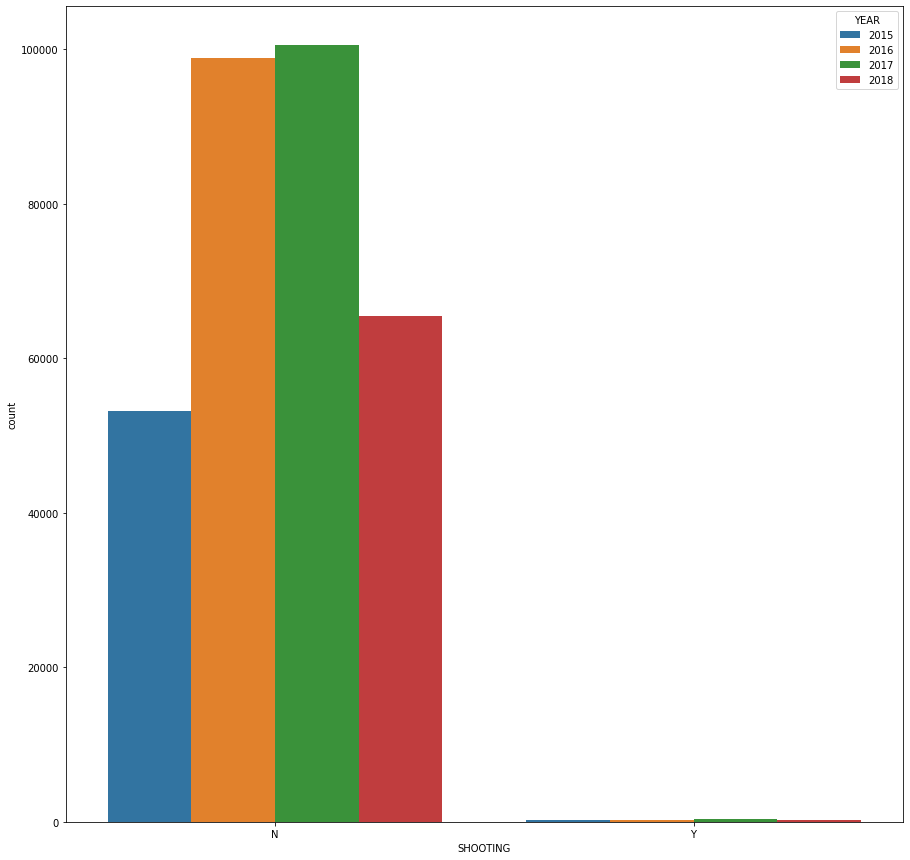

In [115]:

plt.figure(figsize=(15,15))
sns.countplot(data=crimes_df_panda,x="SHOOTING",hue="YEAR")


In [116]:
crimes_df_panda.corr()

,OFFENSE_CODE,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,DAY_OF_MONTH,Minute,Second
OFFENSE_CODE,1.000000,0.045103,-0.014322,0.003019,-0.017036,-0.004569,0.003214,-0.008242,0.070091,0.016821
YEAR,0.045103,1.000000,-0.383351,0.001232,0.001945,-0.015576,0.015375,-0.017409,0.004483,0.012740
MONTH,-0.014322,-0.383351,1.000000,0.001644,0.002051,-0.004586,0.004695,-0.015771,-0.000177,0.002932
DAY_OF_WEEK,0.003019,0.001232,0.001644,1.000000,0.007039,-0.000119,0.000205,-0.007057,-0.004942,0.001631
HOUR,-0.017036,0.001945,0.002051,0.007039,1.000000,0.007081,-0.007519,0.009392,0.023217,-0.002273
Lat,-0.004569,-0.015576,-0.004586,-0.000119,0.007081,1.000000,-0.999809,-0.002557,-0.001451,0.001573
Long,0.003214,0.015375,0.004695,0.000205,-0.007519,-0.999809,1.000000,0.002567,0.001453,-0.002332
DAY_OF_MONTH,-0.008242,-0.017409,-0.015771,-0.007057,0.009392,-0.002557,0.002567,1.000000,0.001877,0.002335
Minute,0.070091,0.004483,-0.000177,-0.004942,0.023217,-0.001451,0.001453,0.001877,1.000000,0.025359
Second,0.016821,0.012740,0.002932,0.001631,-0.002273,0.001573,-0.002332,0.002335,0.025359,1.000000


In [117]:
# affiche la zone ho has the  most shooting dans l'anné 2017
d=crimes_df_panda[crimes_df_panda["YEAR"]==2017]

In [118]:
d=d.groupby(["Lat","Long"]).count()

In [119]:
d=d.sort_values(by="SHOOTING",ascending=False)

In [120]:
d

,,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,DAY_OF_MONTH,Minute,Second
Lat,Long,,,,,,,,,,,,,,,,
42.361839,-71.059765,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460
42.348624,-71.082776,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448
42.284826,-71.091374,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350
42.256216,-71.124019,341,341,341,341,341,341,341,341,341,341,341,341,341,341,341,341
42.328663,-71.085634,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293
42.297555,-71.059709,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268,268
42.341288,-71.054679,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246
42.334288,-71.072395,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234,234
-1.000000,-1.000000,231,231,231,48,231,231,231,231,231,231,231,231,184,231,231,231


In [121]:
d.index[0]

(42.36183857, -71.05976489)

In [122]:
lat=d.index[0][0]
lang=d.index[0][1]


In [123]:
lat

42.36183857

In [124]:
lang

-71.05976489

In [125]:
import folium


In [126]:
word_map = folium.Map(min_zoom=3,title="Most Shooting Area")
word_map

In [127]:
#create a feature group
group = folium.map.FeatureGroup()
group.add_child(folium.Marker([lat,lang],popup="NEW SUDBURY ST"))
word_map.add_child(group)

In [128]:
crimes_df.show(4)

+------------+--------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+-----------+-----------+------------+------------+------+------+
|OFFENSE_CODE|  OFFENSE_CODE_GROUP| OFFENSE_DESCRIPTION|DISTRICT|REPORTING_AREA|SHOOTING|   OCCURRED_ON_DATE|YEAR|MONTH|DAY_OF_WEEK|HOUR|UCR_PART|     STREET|        Lat|        Long|DAY_OF_MONTH|Minute|Second|
+------------+--------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+-----------+-----------+------------+------------+------+------+
|         619|             Larceny|  LARCENY ALL OTHERS|     D14|           808|       N|2018-09-02 13:00:00|2018|    9|          1|  13|       1| LINCOLN ST|42.35779134|-71.13937053|           2|     0|     0|
|        1402|           Vandalism|           VANDALISM|     C11|           347|       N|2018-08-21 00:00:00|2018|    8|          3|   0|       2|   HECLA S

In [129]:
# verifier que le street est le méme 
crimes_df.filter(crimes_df["Lat"]==lat).filter(crimes_df["Long"]==lang).show()

+------------+------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+--------------+-----------+------------+------------+------+------+
|OFFENSE_CODE|OFFENSE_CODE_GROUP| OFFENSE_DESCRIPTION|DISTRICT|REPORTING_AREA|SHOOTING|   OCCURRED_ON_DATE|YEAR|MONTH|DAY_OF_WEEK|HOUR|UCR_PART|        STREET|        Lat|        Long|DAY_OF_MONTH|Minute|Second|
+------------+------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+--------+--------------+-----------+------------+------------+------+------+
|        3201|     Property Lost|     PROPERTY - LOST|      A1|            77|       N|2018-09-03 14:29:00|2018|    9|          2|  14|       3|NEW SUDBURY ST|42.36183857|-71.05976489|           3|    29|     0|
|        3115|Investigate Person|  INVESTIGATE PERSON|      A1|            77|       N|2018-09-02 16:03:00|2018|    9|          1|  16|       3|NEW SUDB